In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel(r"C:\Users\DELL\Downloads\rainfall.xlsx")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


We have to predict the whether or not it will rain tomorrow and predict how much rainfall could be there, based on the other attributes in the datatset, so this problem is a both regression and classification problem.First lets predict whether it will rain tomorrow

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [7]:
df.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8137,2012-03-07,Darwin,23.8,32.2,28.8,5.8,9.3,SE,72.0,SSE,...,79.0,66.0,1006.6,1003.1,6.0,7.0,28.2,31.0,Yes,Yes


In [8]:
df.tail(14)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8411,2017-06-12,Uluru,5.1,19.7,0.0,NaN,NaN,E,46.0,ESE,...,56.0,29.0,1028.5,1025.8,NaN,NaN,8.5,19.2,No,No
8412,2017-06-13,Uluru,2.5,21.2,0.0,NaN,NaN,ENE,35.0,ESE,...,57.0,32.0,1027.2,1023.0,NaN,NaN,10.3,20.3,No,No
8413,2017-06-14,Uluru,2.3,21.4,0.0,NaN,NaN,SE,22.0,SE,...,60.0,28.0,1026.9,1022.8,NaN,NaN,8.9,20.3,No,No
8414,2017-06-15,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,59.0,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No,No
8415,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
8416,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
8417,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
8418,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No


# EXPLORATORY DATA ANALYSIS 

In [9]:
df.shape

(8425, 23)

In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [11]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [12]:
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numeric_cols = df.select_dtypes(include='float64').columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

missing_values = df.isnull().sum()
print("Remaining missing values:\n", missing_values)


Remaining missing values:
 Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8425 non-null   float64       
 3   MaxTemp        8425 non-null   float64       
 4   Rainfall       8425 non-null   float64       
 5   Evaporation    8425 non-null   float64       
 6   Sunshine       8425 non-null   float64       
 7   WindGustDir    8425 non-null   object        
 8   WindGustSpeed  8425 non-null   float64       
 9   WindDir9am     8425 non-null   object        
 10  WindDir3pm     8425 non-null   object        
 11  WindSpeed9am   8425 non-null   float64       
 12  WindSpeed3pm   8425 non-null   float64       
 13  Humidity9am    8425 non-null   float64       
 14  Humidity3pm    8425 non-null   float64       
 15  Pressure9am    8425 n

In [15]:
for i in df.columns:
    print(df[i].unique())
    print('\n')
    print(df[i].nunique())
    print('\n')

['2008-12-01T00:00:00.000000000' '2008-12-02T00:00:00.000000000'
 '2008-12-03T00:00:00.000000000' ... '2013-06-06T00:00:00.000000000'
 '2013-06-07T00:00:00.000000000' '2013-06-08T00:00:00.000000000']


3004


['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']


12


[13.4         7.4        12.9         9.2        17.5        14.6
 14.3         7.7         9.7        13.1        15.9        12.6
  8.4         9.8        14.1        13.5        11.2        11.5
 17.1        20.5        15.3        16.2        16.9        20.1
 19.7        12.5        12.         11.3         9.6        10.5
 12.3        13.7        16.1        14.         17.         17.3
 17.2        17.4        19.8        14.9        13.9        18.6
 19.3        24.4        18.8        20.8        15.7        18.5
 20.4        21.8        22.3        22.         28.         21.5
 21.7        23.5        28.3        18.4       

In [16]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

<Axes: xlabel='RainToday', ylabel='Humidity9am'>

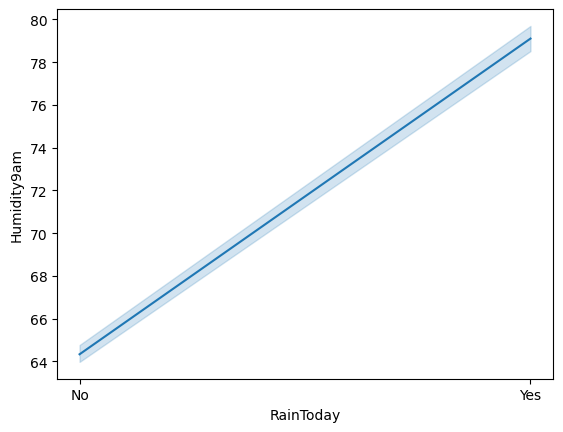

In [18]:
sns.lineplot(x="RainToday",y="Humidity9am",data=df)

<Axes: xlabel='RainToday', ylabel='Humidity3pm'>

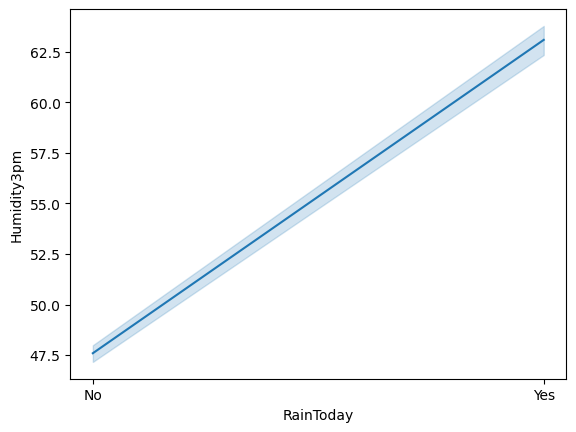

In [19]:
sns.lineplot(x="RainToday",y="Humidity3pm",data=df)

<Axes: xlabel='Pressure9am', ylabel='Humidity9am'>

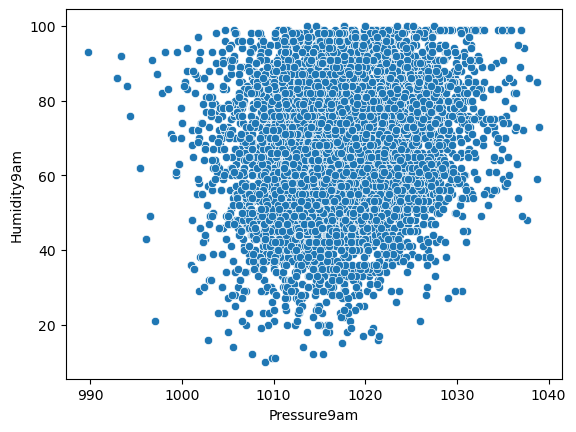

In [20]:
sns.scatterplot(x="Pressure9am",y="Humidity9am",data=df)

<Axes: xlabel='Pressure3pm', ylabel='Humidity3pm'>

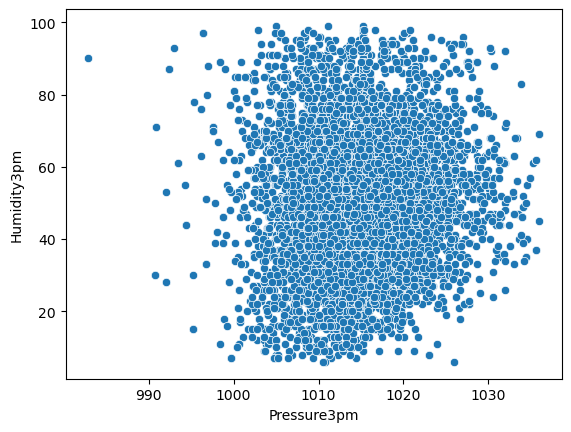

In [24]:
sns.scatterplot(x="Pressure3pm",y="Humidity3pm",data=df)

<Axes: xlabel='WindGustSpeed', ylabel='Rainfall'>

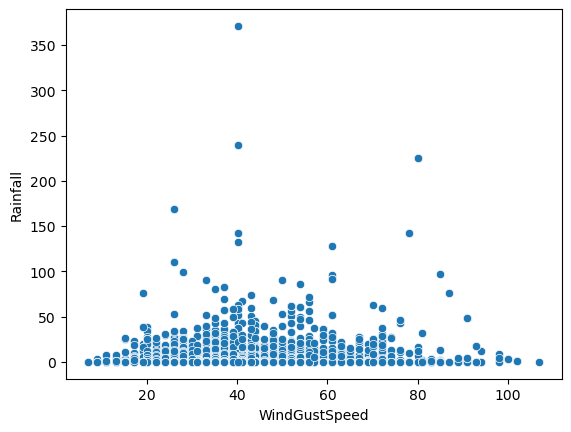

In [26]:
sns.scatterplot(y="Rainfall",x="WindGustSpeed",data=df)

<Axes: xlabel='MaxTemp', ylabel='Rainfall'>

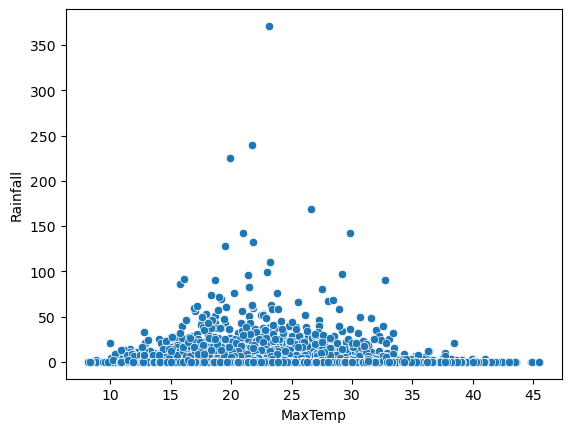

In [28]:
sns.scatterplot(y="Rainfall",x="MaxTemp",data=df)

<Axes: xlabel='WindSpeed9am', ylabel='WindDir9am'>

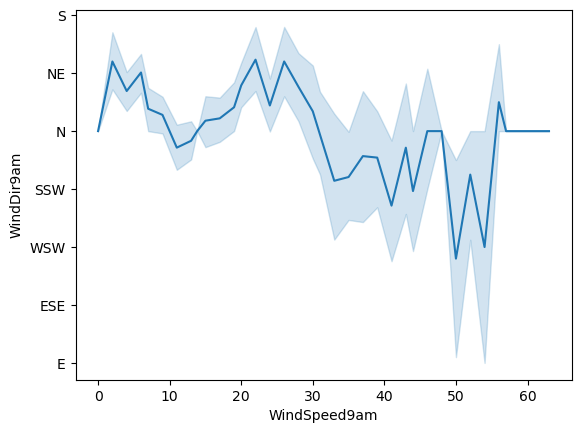

In [29]:
sns.lineplot(y="WindDir9am",x="WindSpeed9am",data=df)

<Axes: xlabel='WindSpeed3pm', ylabel='WindDir3pm'>

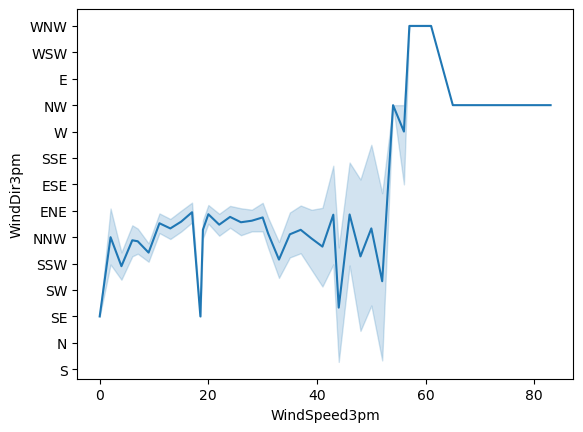

In [30]:
sns.lineplot(y="WindDir3pm",x="WindSpeed3pm",data=df)

WNW direction had the highest wind speed at 3pm

<Axes: xlabel='Temp9am', ylabel='Cloud9am'>

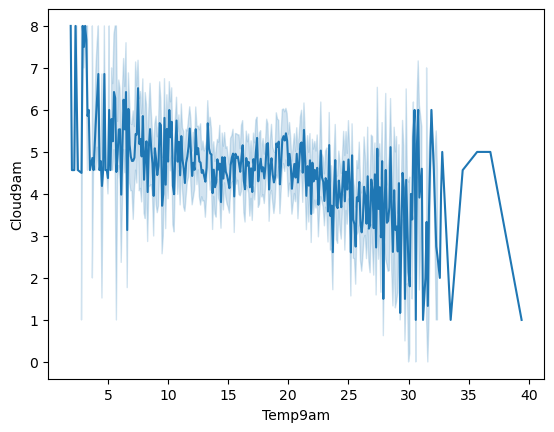

In [31]:
sns.lineplot(y="Cloud9am",x="Temp9am",data=df)

When the temperature is gradually increasing the cloud formation is actually decreasing.

<Axes: xlabel='Temp3pm', ylabel='Cloud3pm'>

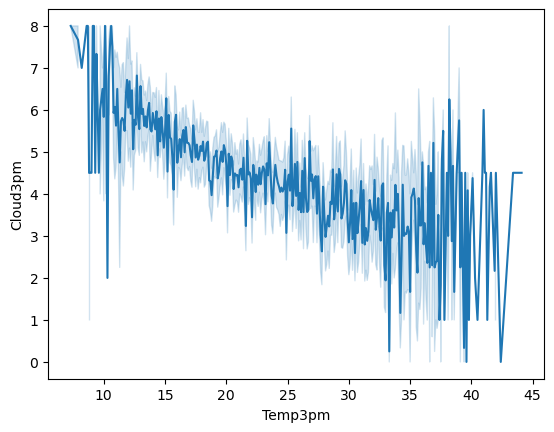

In [32]:
sns.lineplot(y="Cloud3pm",x="Temp3pm",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'W'),
  Text(1, 0, 'WNW'),
  Text(2, 0, 'WSW'),
  Text(3, 0, 'NE'),
  Text(4, 0, 'NNW'),
  Text(5, 0, 'N'),
  Text(6, 0, 'NNE'),
  Text(7, 0, 'SW'),
  Text(8, 0, 'ENE'),
  Text(9, 0, 'SSE'),
  Text(10, 0, 'S'),
  Text(11, 0, 'NW'),
  Text(12, 0, 'SE'),
  Text(13, 0, 'ESE'),
  Text(14, 0, 'E'),
  Text(15, 0, 'SSW')])

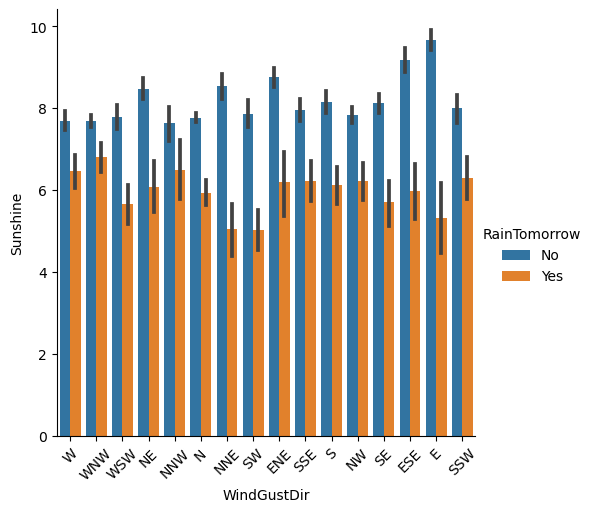

In [37]:
sns.catplot(y="Sunshine",hue="RainTomorrow",x="WindGustDir",data=df,kind="bar")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

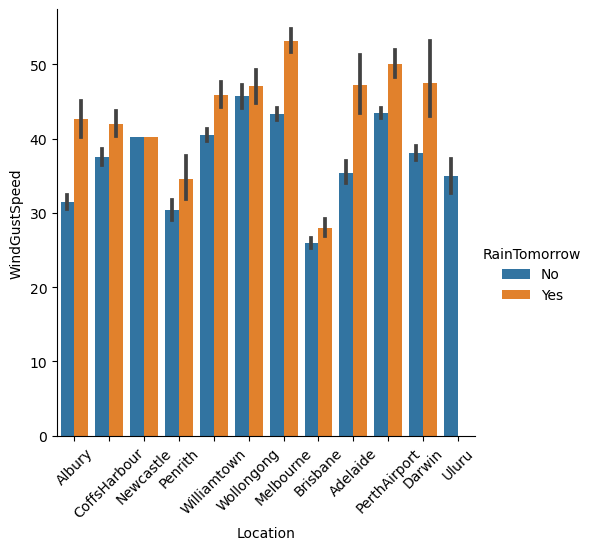

In [38]:
sns.catplot(y="WindGustSpeed",hue="RainTomorrow",x="Location",data=df,kind="bar")
plt.xticks(rotation=45)

<Axes: xlabel='Cloud9am', ylabel='Count'>

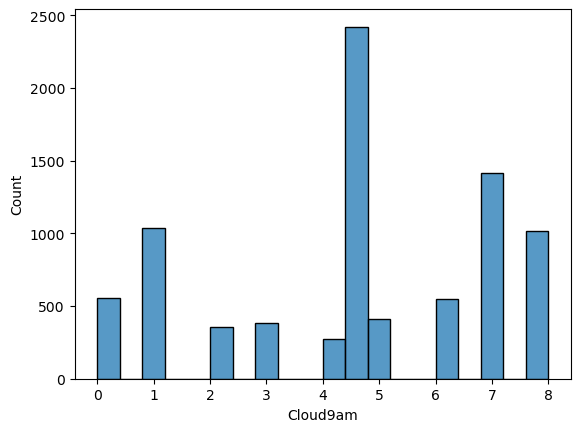

In [39]:
sns.histplot(x="Cloud9am",data=df,bins=20)

<Axes: xlabel='Rainfall', ylabel='Count'>

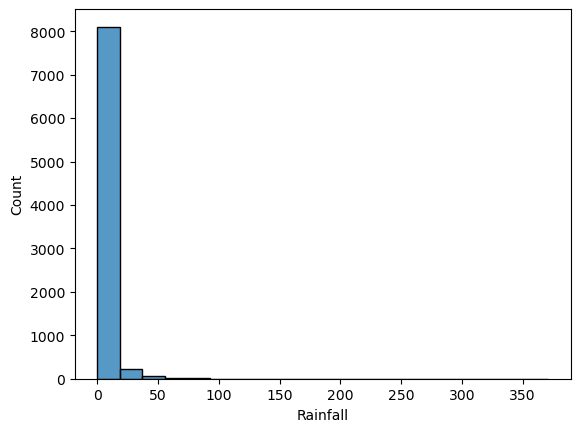

In [40]:
sns.histplot(x="Rainfall",data=df,bins=20)

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64

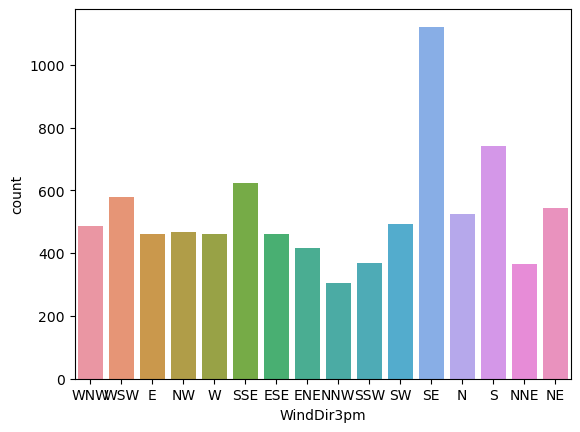

In [42]:
sns.countplot(x="WindDir3pm", data = df)
df['WindDir3pm'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

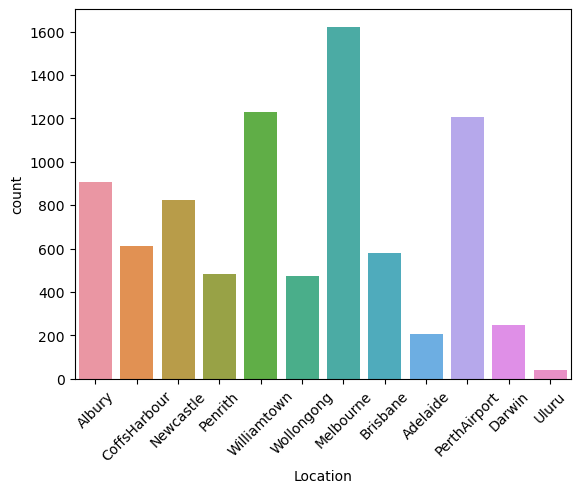

In [44]:
sns.countplot(x="Location", data = df)
df['Location'].value_counts()
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

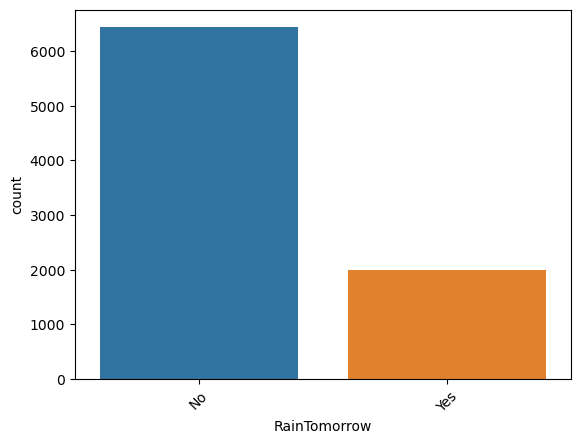

In [45]:
sns.countplot(x="RainTomorrow", data = df)
df['RainTomorrow'].value_counts()
plt.xticks(rotation=45)

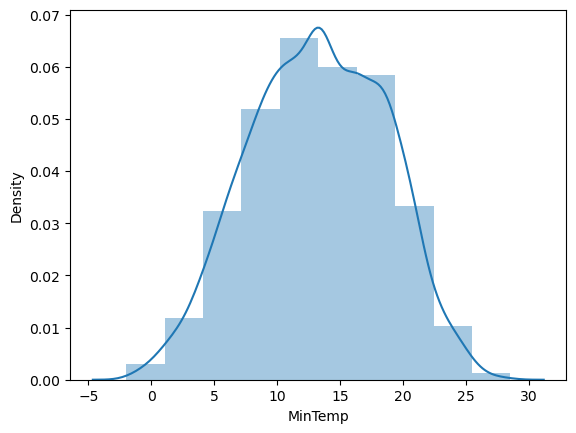

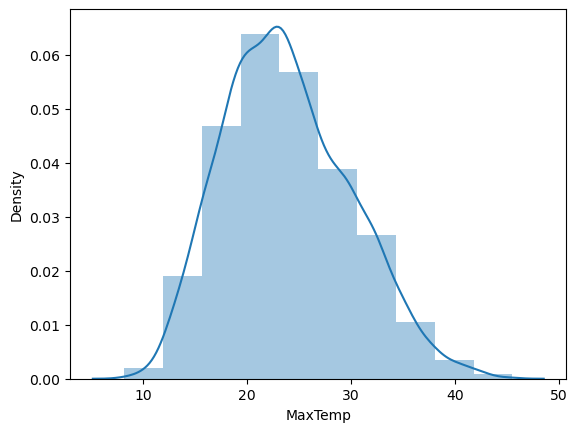

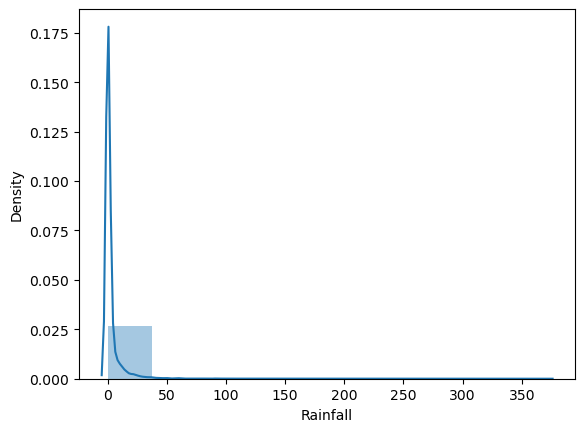

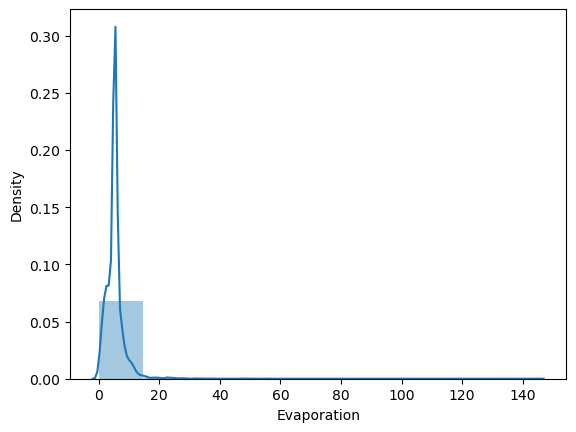

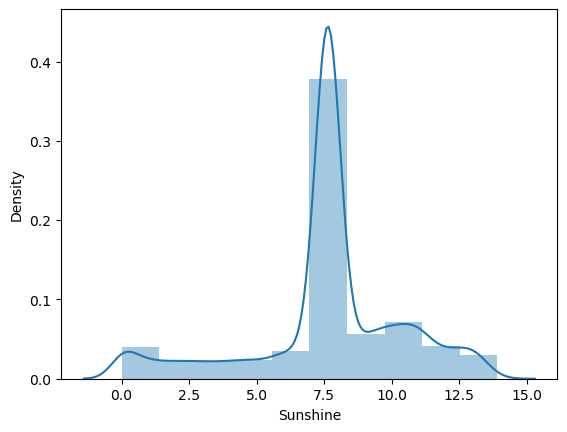

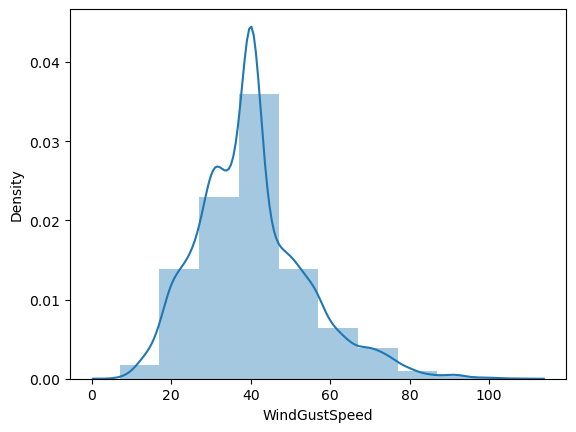

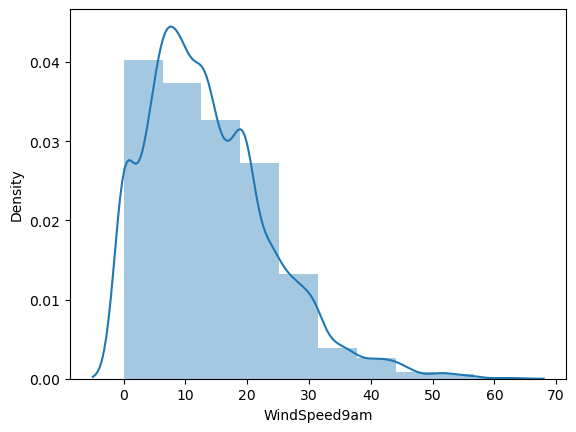

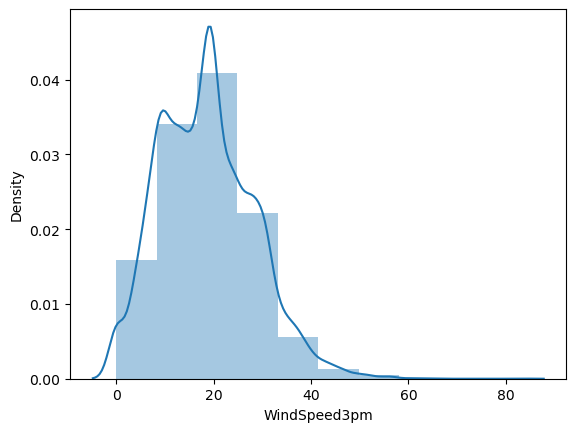

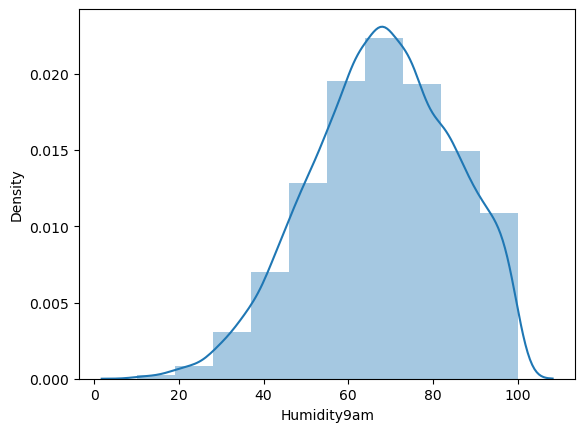

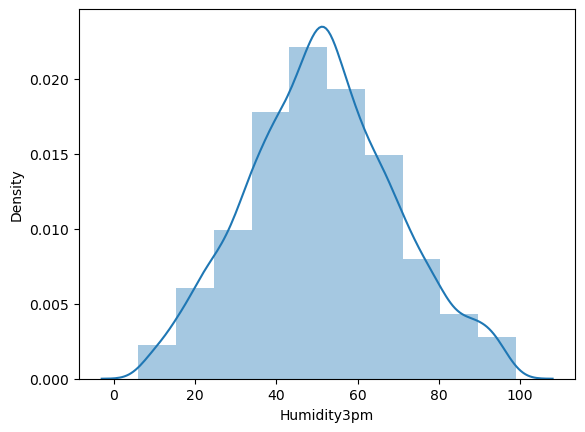

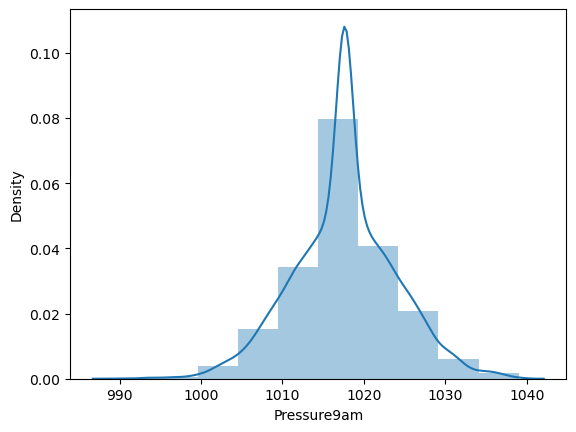

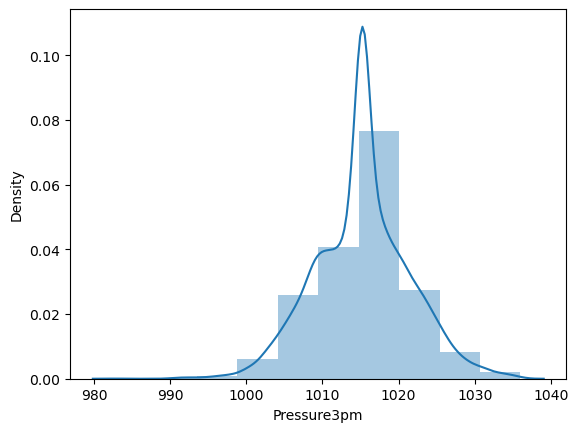

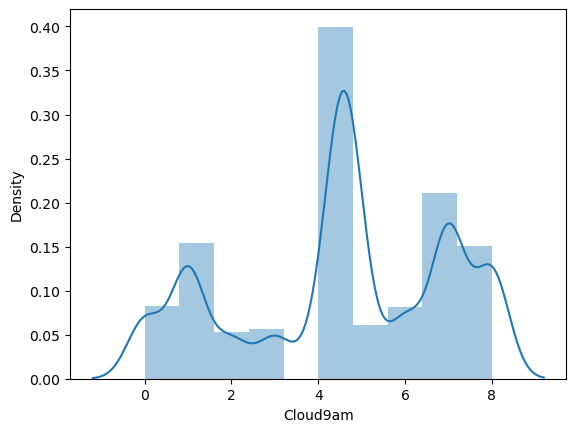

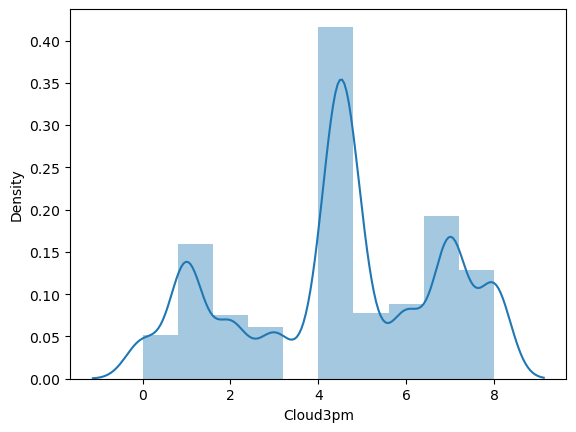

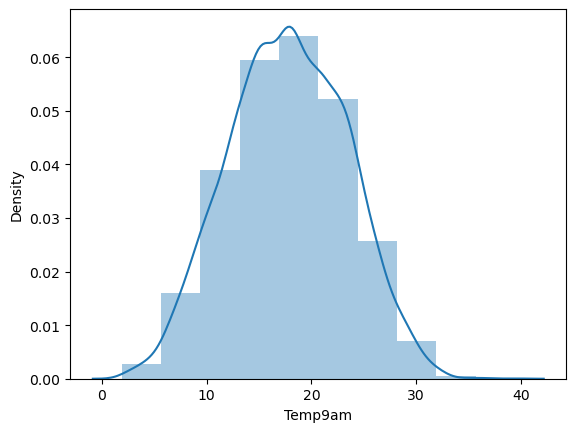

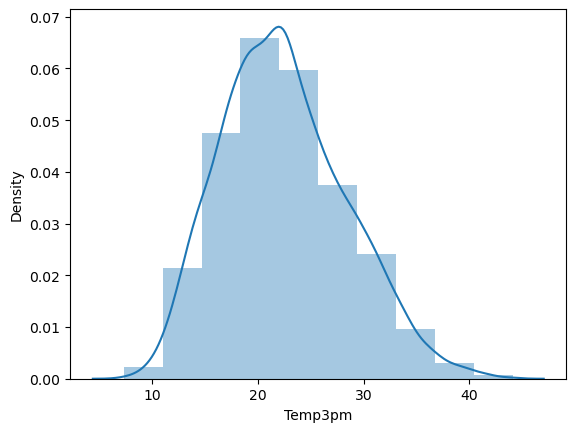

In [46]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        sns.distplot(df[i], bins=10) 
        plt.show()  
    print('\n')

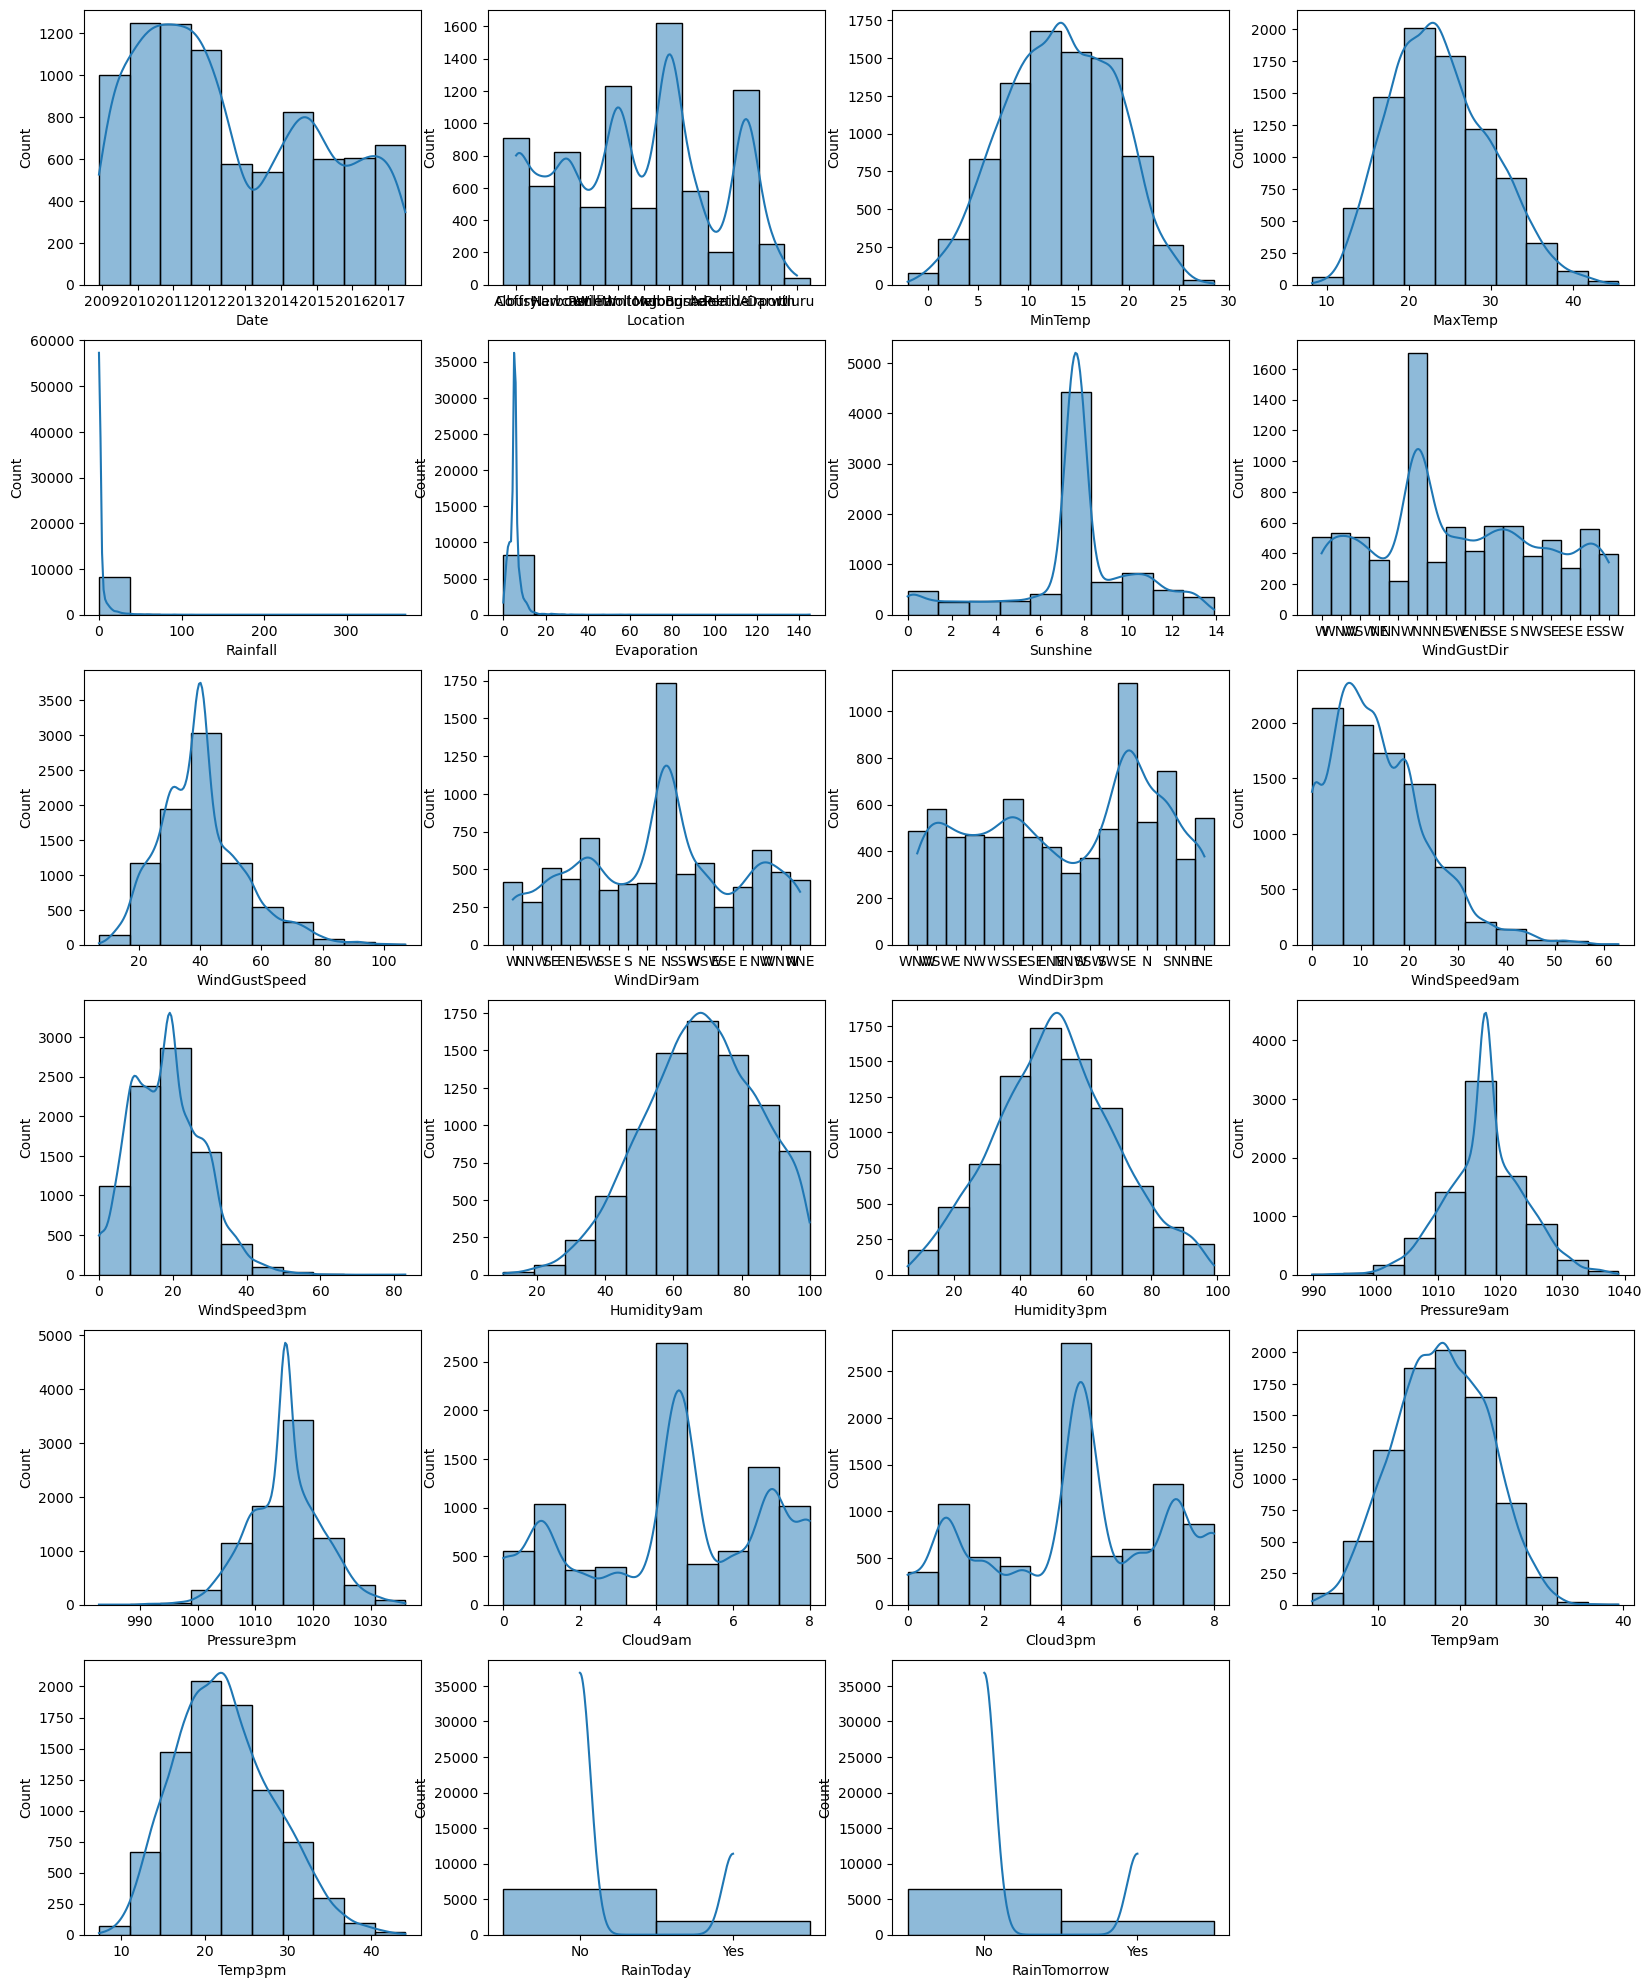

In [48]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=24:
        plt.subplot(6,4,p)
        sns.histplot(df[i], bins=10, kde=True, palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
    
plt.show()

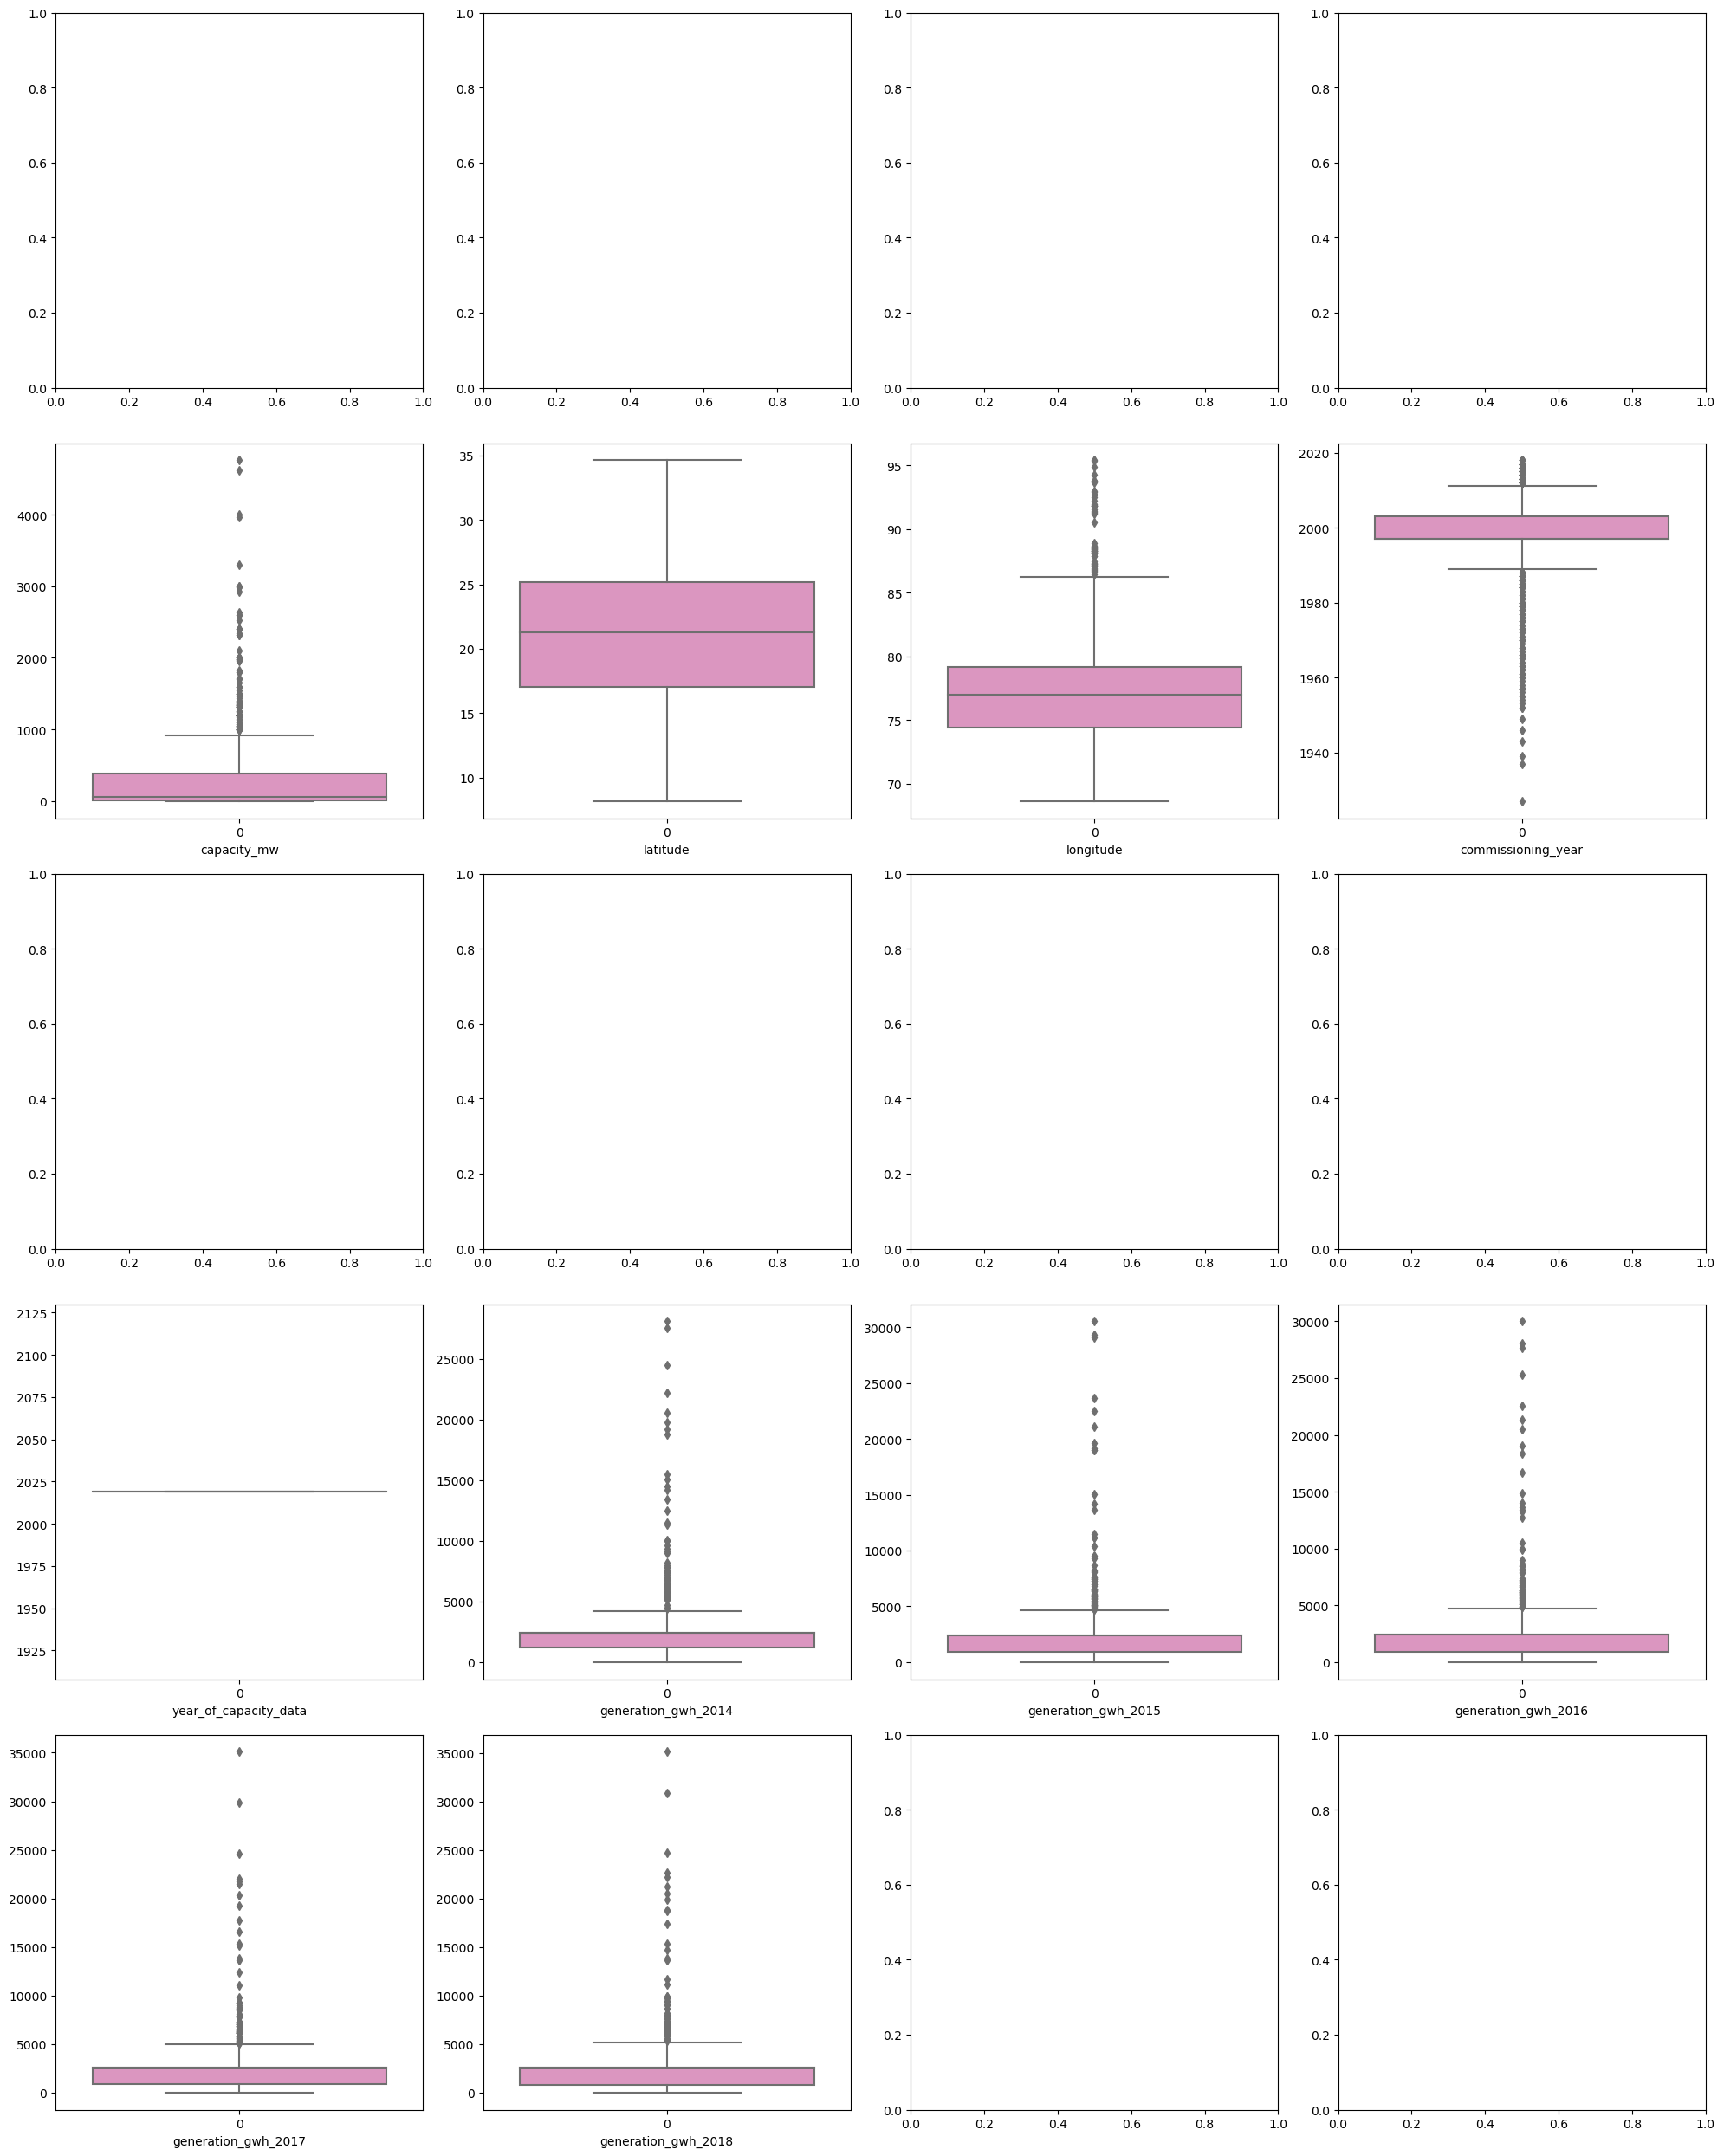

In [63]:
#Checking outliers using boxplot
plt.figure(figsize=(20, 25))
p = 1

for i in df.columns:
    if p <= 20:
        plt.subplot(5, 4, p)

        if df[i].dtype in ['float64', 'int64']:
            sns.boxplot(df[i], palette='Set2_r')
            plt.xlabel(i)
    p += 1

plt.tight_layout()
plt.show()

There are definitely outliers, that can be seen thrugh the above graph, we can remove them using zscore method.

In [49]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [51]:
from scipy.stats import zscore 
out_features = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm']]
z=np.abs(zscore(out_features))
z[np.isnan(z)] = 0
z

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.038425,1.570089e-01,0.213986,2.305893e-16,3.143679e-16,0.277710,0.607461,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138
1,1.076989,2.028121e-01,0.272189,2.305893e-16,3.143679e-16,0.277710,0.972321,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348
2,0.054526,3.009450e-01,0.272189,2.305893e-16,3.143679e-16,0.422897,0.508725,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334
3,0.742365,6.771214e-01,0.272189,2.305893e-16,3.143679e-16,1.174166,0.281166,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376
4,0.800625,1.380408e+00,0.175183,2.305893e-16,3.143679e-16,0.059928,0.676112,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.932140,7.523137e-02,0.272189,2.305893e-16,3.143679e-16,0.666009,0.083694,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221
8421,1.783418,2.355231e-01,0.272189,2.305893e-16,3.143679e-16,1.319354,0.083694,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987
8422,1.448794,4.972110e-01,0.272189,2.305893e-16,3.143679e-16,0.230447,0.478639,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099
8423,1.002628,5.135665e-01,0.272189,2.305893e-16,3.143679e-16,0.883791,0.083694,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279


In [52]:
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
         683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
         949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
        1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
        1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
        1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
        2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
        2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
        2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
        2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
        3059, 3060, 3066, 3067, 3067, 

In [53]:
df1 = df[(z<3).all(axis = 1)]
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


# Checking for skewness

In [54]:
df1.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [55]:
df1.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         3.488446
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

In [56]:
from scipy.stats import boxcox 

df1['Rainfall'], _ = boxcox(df1['Rainfall'] + 1)

In [57]:
df1.skew()

MinTemp         -0.084549
MaxTemp          0.314510
Rainfall         0.913570
Evaporation      0.846181
Sunshine        -0.723970
WindGustSpeed    0.506897
WindSpeed9am     0.711395
WindSpeed3pm     0.300109
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020735
Pressure3pm      0.044876
Cloud9am        -0.356892
Cloud3pm        -0.266829
Temp9am         -0.038035
Temp3pm          0.334170
dtype: float64

ENCODING ALL THE CATEGORICAL DATA

In [58]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))
    
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1.0,13.4,22.900000,0.333824,5.389395,7.632205,13.0,44.000000,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,2008-12-02,1.0,7.4,25.100000,0.000000,5.389395,7.632205,14.0,44.000000,6.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2008-12-03,1.0,12.9,25.700000,0.000000,5.389395,7.632205,15.0,46.000000,13.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,2008-12-04,1.0,9.2,28.000000,0.000000,5.389395,7.632205,4.0,24.000000,9.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,2008-12-05,1.0,17.5,32.300000,0.424896,5.389395,7.632205,13.0,41.000000,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9.0,2.8,23.400000,0.000000,5.389395,7.632205,0.0,31.000000,9.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,2017-06-22,9.0,3.6,25.300000,0.000000,5.389395,7.632205,6.0,22.000000,9.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,2017-06-23,9.0,5.4,26.900000,0.000000,5.389395,7.632205,3.0,37.000000,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,2017-06-24,9.0,7.8,27.000000,0.000000,5.389395,7.632205,9.0,28.000000,10.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


In [59]:
df1.dtypes

Date             datetime64[ns]
Location                float64
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir             float64
WindGustSpeed           float64
WindDir9am              float64
WindDir3pm              float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RainTomorrow            float64
dtype: object

# Checking correlation

In [60]:
cor = df1.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.116694,0.063798,0.025575,0.132245,0.048579,-0.037707,0.245658,-0.041030,-0.031195,...,0.003725,0.059978,-0.024265,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222
MinTemp,0.116694,1.000000,0.718598,0.077213,0.372576,0.065682,-0.154935,0.231097,-0.045231,-0.154184,...,-0.126383,0.090208,-0.433113,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021
MaxTemp,0.063798,0.718598,1.000000,-0.237227,0.468786,0.387050,-0.237955,0.136337,-0.217160,-0.190417,...,-0.382687,-0.409560,-0.333569,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708
Rainfall,0.025575,0.077213,-0.237227,1.000000,-0.194249,-0.262098,0.142840,0.094373,0.157531,0.120391,...,0.401551,0.378034,-0.125495,-0.044327,0.305191,0.263722,-0.103803,-0.248837,0.875795,0.316060
Evaporation,0.132245,0.372576,0.468786,-0.194249,1.000000,0.369080,-0.121384,0.200769,-0.115309,-0.036752,...,-0.325325,-0.231465,-0.262043,-0.275720,-0.116113,-0.146421,0.439628,0.454352,-0.163847,-0.089365
Sunshine,0.048579,0.065682,0.387050,-0.262098,0.369080,1.000000,-0.104739,0.009797,-0.076595,-0.069789,...,-0.366337,-0.437504,-0.004078,-0.063832,-0.527350,-0.541996,0.261680,0.403489,-0.219089,-0.317675
WindGustDir,-0.037707,-0.154935,-0.237955,0.142840,-0.121384,-0.104739,1.000000,0.005465,0.405681,0.507292,...,0.031081,0.051061,-0.095047,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378
WindGustSpeed,0.245658,0.231097,0.136337,0.094373,0.200769,0.009797,0.005465,1.000000,-0.069460,0.076737,...,-0.263933,-0.085009,-0.377284,-0.336132,0.013678,0.064375,0.198936,0.101786,0.076677,0.181478
WindDir9am,-0.041030,-0.045231,-0.217160,0.157531,-0.115309,-0.076595,0.405681,-0.069460,1.000000,0.243622,...,0.009571,0.117910,-0.003943,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091
WindDir3pm,-0.031195,-0.154184,-0.190417,0.120391,-0.036752,-0.069789,0.507292,0.076737,0.243622,1.000000,...,-0.007820,-0.009385,-0.129842,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674


In [61]:
cor['RainTomorrow'].sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
Rainfall         0.316060
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
WindGustSpeed    0.181478
MinTemp          0.091021
WindSpeed9am     0.057933
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Temp9am         -0.021459
Evaporation     -0.089365
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.317675
Name: RainTomorrow, dtype: float64

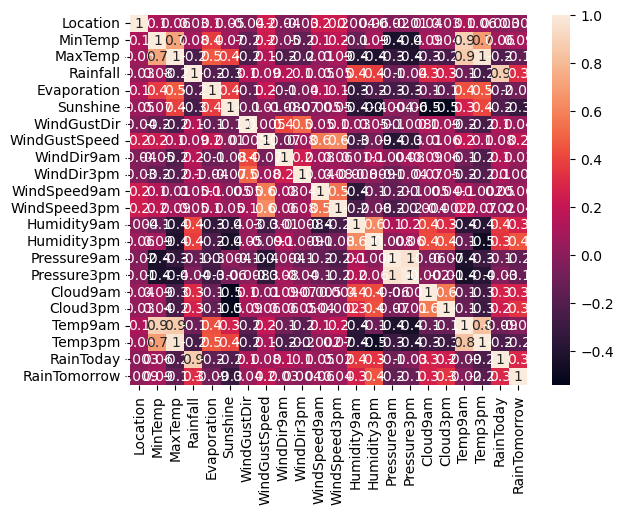

In [62]:
sns.heatmap(df1.corr(), annot = True, fmt = ".1g")
plt.show()

<Axes: >

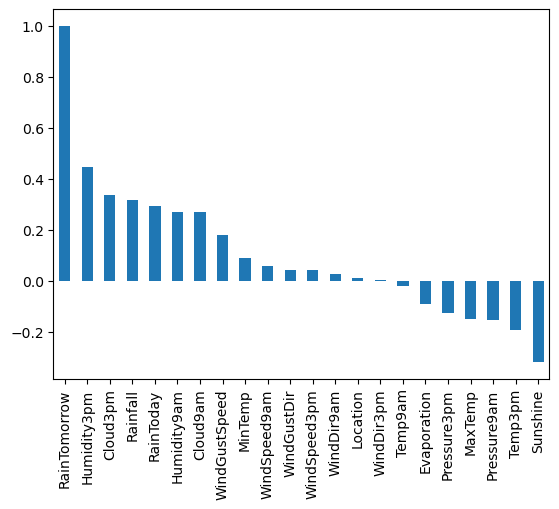

In [63]:
cor['RainTomorrow'].sort_values(ascending = False).plot(kind='bar')

In [64]:
df2=df1.copy()

# Feature scaling and standardisation

In [65]:
x=df1.drop("RainTomorrow", axis=1)
y=df1['RainTomorrow']

In [66]:
x.shape

(7987, 22)

In [67]:
y.shape

(7987,)

In [70]:
x.dtypes

Date             datetime64[ns]
Location                float64
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir             float64
WindGustSpeed           float64
WindDir9am              float64
WindDir3pm              float64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
dtype: object

In [71]:
x['Date'] = x['Date'].astype('int64') // 10**9  


print(x['Date'].dtype)


int64


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.493824,-1.508427,0.056444,-0.145732,0.617396,0.110484,-0.013374,1.229267,0.364103,1.250245,...,0.638072,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476
1,-1.492705,-1.508427,-1.058476,0.220676,-0.693670,0.110484,-0.013374,1.441960,0.364103,-0.277857,...,0.421555,-1.455097,-1.457752,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476
2,-1.491585,-1.508427,-0.036466,0.320605,-0.693670,0.110484,-0.013374,1.654654,0.520531,1.250245,...,0.854590,-1.819368,-1.180382,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476
3,-1.490466,-1.508427,-0.724000,0.703668,-0.693670,0.110484,-0.013374,-0.684977,-1.200173,0.377044,...,-0.985811,-1.394385,-1.957019,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476
4,-1.489346,-1.508427,0.818306,1.419829,0.975076,0.110484,-0.013374,1.229267,0.129462,-1.369358,...,0.205037,0.851954,-1.013959,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,2.003756,1.029423,-1.913248,-0.062457,-0.693670,0.110484,-0.013374,-1.535751,-0.652677,0.377044,...,-0.769293,-1.030114,-1.513226,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476
7983,2.004875,1.029423,-1.764592,0.253986,-0.693670,0.110484,-0.013374,-0.259589,-1.356601,0.377044,...,-0.985811,-0.726555,-1.679648,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476
7984,2.005995,1.029423,-1.430116,0.520464,-0.693670,0.110484,-0.013374,-0.897670,-0.183394,0.377044,...,-0.985811,-0.908690,-1.513226,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476
7985,2.007114,1.029423,-0.984148,0.537119,-0.693670,0.110484,-0.013374,0.378492,-0.887318,0.595344,...,-1.202329,-1.030114,-1.513226,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.500244,Date
1,1.551544,Location
2,8.631471,MinTemp
3,26.359359,MaxTemp
4,4.783323,Rainfall
5,1.555330,Evaporation
6,1.938823,Sunshine
7,1.615046,WindGustDir
8,2.311127,WindGustSpeed
9,1.350952,WindDir9am


In [74]:
y.value_counts()

0.0    6165
1.0    1822
Name: RainTomorrow, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)

Best accuracy is 0.9061326658322904 at random state 80


In [76]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [77]:
y1.value_counts()

0.0    6165
1.0    6165
Name: RainTomorrow, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFR  = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)
    

Best accuracy is 0.9407948094079481 at random state 160


Before sampling , the accuracy was 90% and after sampling the accuracy is 94%, so proceeding with the sampled class

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = rs) 


In [80]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

In [81]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9407948094079481
[[1741  120]
 [  99 1739]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      1861
         1.0       0.94      0.95      0.94      1838

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



In [82]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train, y_train)
predETC = ETC.predict(x_test)
print(accuracy_score(y_test,predETC))
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

0.9507975128413084
[[1749  112]
 [  70 1768]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1861
         1.0       0.94      0.96      0.95      1838

    accuracy                           0.95      3699
   macro avg       0.95      0.95      0.95      3699
weighted avg       0.95      0.95      0.95      3699



In [83]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7777777777777778
[[1470  391]
 [ 431 1407]]
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1861
         1.0       0.78      0.77      0.77      1838

    accuracy                           0.78      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.78      0.78      0.78      3699



In [84]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8569883752365505
[[1534  327]
 [ 202 1636]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1861
         1.0       0.83      0.89      0.86      1838

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699



In [85]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8126520681265207
[[1504  357]
 [ 336 1502]]
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      1861
         1.0       0.81      0.82      0.81      1838

    accuracy                           0.81      3699
   macro avg       0.81      0.81      0.81      3699
weighted avg       0.81      0.81      0.81      3699



In [86]:
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9113273857799405
[[1730  131]
 [ 197 1641]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1861
         1.0       0.93      0.89      0.91      1838

    accuracy                           0.91      3699
   macro avg       0.91      0.91      0.91      3699
weighted avg       0.91      0.91      0.91      3699



In [87]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8615842119491754
[[1730  131]
 [ 197 1641]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1861
         1.0       0.93      0.89      0.91      1838

    accuracy                           0.91      3699
   macro avg       0.91      0.91      0.91      3699
weighted avg       0.91      0.91      0.91      3699



# cross val score

In [88]:
#Random forest 
score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predRFC)-score.mean())

[0.66504461 0.63219789 0.88199513 0.88969992 0.84103812]
0.7819951338199513
Difference is 0.1587996755879968


In [89]:
#Extra Trees
score = cross_val_score(ETC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predETC)-score.mean())

[0.67356042 0.68734793 0.89132198 0.89537713 0.83536091]
0.7965936739659367
Difference is 0.1542038388753717


In [90]:
#Logistic regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predLR)-score.mean())

[0.68734793 0.65693431 0.65044607 0.73033252 0.81914031]
0.7088402270884023
Difference is 0.06893755068937546


In [91]:
#SVC
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predsvc)-score.mean())

[0.66707218 0.62246553 0.7404704  0.78304947 0.77899432]
0.7184103811841038
Difference is 0.13857799405244664


In [92]:
#Adaboost
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predABC)-score.mean())

[0.59610706 0.51703163 0.67518248 0.70762368 0.756691  ]
0.6505271695052717
Difference is 0.16212489862124901


In [93]:
#Bagging
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predBC)-score.mean())

[0.61516626 0.60340633 0.88969992 0.86536902 0.78264396]
0.7512570965125709
Difference is 0.16007028926736966


In [94]:
#Gradient boosting
score = cross_val_score(GBC,x1,y1)
print(score)
print(score.mean())
print("Difference is", accuracy_score(y_test,predGBC)-score.mean())

[0.60827251 0.52473642 0.74412003 0.75344688 0.71330089]
0.6687753446877535
Difference is 0.192808867261422


Considering the cross val score and the model individual performance, selecting SVC as the best fitting model.

# Hyperparameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  
    'degree': [2, 3, 4],         
    'random_state': [10, 50, 5000]
}

In [98]:
GCV = GridSearchCV(SVC(), parameters, cv = 5, n_jobs=-1)

In [99]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'random_state': [10, 50, 5000]})

In [100]:
GCV.best_params_

{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 10}

In [102]:
final_model = SVC(C=10, degree=2, gamma='auto', kernel='rbf', random_state=50)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(str(acc*100) + "%")

91.18680724520141%


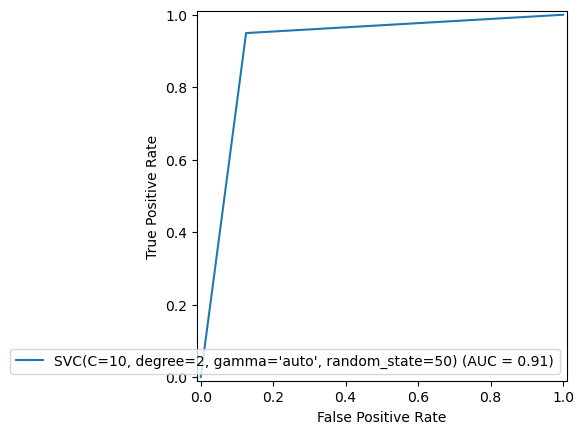

In [103]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=final_model)
display.plot()

# Prediction of rainfall

In [104]:
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1.0,13.4,22.900000,0.333824,5.389395,7.632205,13.0,44.000000,13.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,2008-12-02,1.0,7.4,25.100000,0.000000,5.389395,7.632205,14.0,44.000000,6.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2008-12-03,1.0,12.9,25.700000,0.000000,5.389395,7.632205,15.0,46.000000,13.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,2008-12-04,1.0,9.2,28.000000,0.000000,5.389395,7.632205,4.0,24.000000,9.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,2008-12-05,1.0,17.5,32.300000,0.424896,5.389395,7.632205,13.0,41.000000,1.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9.0,2.8,23.400000,0.000000,5.389395,7.632205,0.0,31.000000,9.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,2017-06-22,9.0,3.6,25.300000,0.000000,5.389395,7.632205,6.0,22.000000,9.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,2017-06-23,9.0,5.4,26.900000,0.000000,5.389395,7.632205,3.0,37.000000,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,2017-06-24,9.0,7.8,27.000000,0.000000,5.389395,7.632205,9.0,28.000000,10.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


# Checking correlation

In [105]:
cor = df2.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.116694,0.063798,0.025575,0.132245,0.048579,-0.037707,0.245658,-0.041030,-0.031195,...,0.003725,0.059978,-0.024265,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222
MinTemp,0.116694,1.000000,0.718598,0.077213,0.372576,0.065682,-0.154935,0.231097,-0.045231,-0.154184,...,-0.126383,0.090208,-0.433113,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021
MaxTemp,0.063798,0.718598,1.000000,-0.237227,0.468786,0.387050,-0.237955,0.136337,-0.217160,-0.190417,...,-0.382687,-0.409560,-0.333569,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708
Rainfall,0.025575,0.077213,-0.237227,1.000000,-0.194249,-0.262098,0.142840,0.094373,0.157531,0.120391,...,0.401551,0.378034,-0.125495,-0.044327,0.305191,0.263722,-0.103803,-0.248837,0.875795,0.316060
Evaporation,0.132245,0.372576,0.468786,-0.194249,1.000000,0.369080,-0.121384,0.200769,-0.115309,-0.036752,...,-0.325325,-0.231465,-0.262043,-0.275720,-0.116113,-0.146421,0.439628,0.454352,-0.163847,-0.089365
Sunshine,0.048579,0.065682,0.387050,-0.262098,0.369080,1.000000,-0.104739,0.009797,-0.076595,-0.069789,...,-0.366337,-0.437504,-0.004078,-0.063832,-0.527350,-0.541996,0.261680,0.403489,-0.219089,-0.317675
WindGustDir,-0.037707,-0.154935,-0.237955,0.142840,-0.121384,-0.104739,1.000000,0.005465,0.405681,0.507292,...,0.031081,0.051061,-0.095047,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378
WindGustSpeed,0.245658,0.231097,0.136337,0.094373,0.200769,0.009797,0.005465,1.000000,-0.069460,0.076737,...,-0.263933,-0.085009,-0.377284,-0.336132,0.013678,0.064375,0.198936,0.101786,0.076677,0.181478
WindDir9am,-0.041030,-0.045231,-0.217160,0.157531,-0.115309,-0.076595,0.405681,-0.069460,1.000000,0.243622,...,0.009571,0.117910,-0.003943,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091
WindDir3pm,-0.031195,-0.154184,-0.190417,0.120391,-0.036752,-0.069789,0.507292,0.076737,0.243622,1.000000,...,-0.007820,-0.009385,-0.129842,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674


In [106]:
cor['Rainfall'].sort_values(ascending = False)

Rainfall         1.000000
RainToday        0.875795
Humidity9am      0.401551
Humidity3pm      0.378034
RainTomorrow     0.316060
Cloud9am         0.305191
Cloud3pm         0.263722
WindDir9am       0.157531
WindGustDir      0.142840
WindDir3pm       0.120391
WindGustSpeed    0.094373
MinTemp          0.077213
WindSpeed3pm     0.049123
WindSpeed9am     0.048299
Location         0.025575
Pressure3pm     -0.044327
Temp9am         -0.103803
Pressure9am     -0.125495
Evaporation     -0.194249
MaxTemp         -0.237227
Temp3pm         -0.248837
Sunshine        -0.262098
Name: Rainfall, dtype: float64

<Axes: >

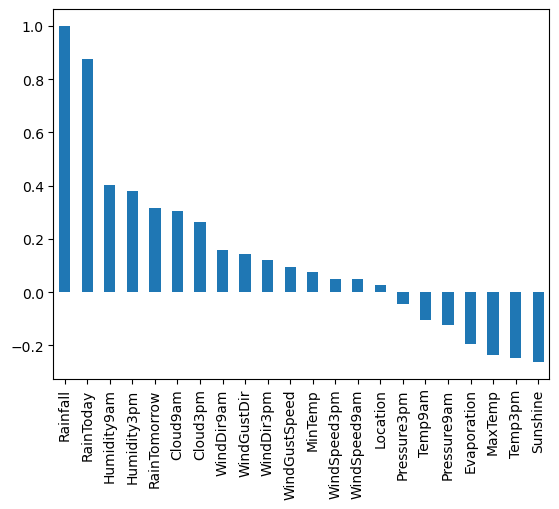

In [107]:
cor['Rainfall'].sort_values(ascending = False).plot(kind='bar')

# Seperating feautures and model

In [108]:
x= df2.drop("Rainfall", axis=1)
y=df2['Rainfall']

In [109]:
x.shape

(7987, 22)

In [110]:
y.shape

(7987,)

# Feature Scaling and standardisation

In [111]:
x['Date'] = x['Date'].astype('int64') // 10**9  
print(x['Date'].dtype)

int64


In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.493824,-1.508427,0.056444,-0.145732,0.110484,-0.013374,1.229267,0.364103,1.250245,1.400214,...,0.184123,-1.624174,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635
1,-1.492705,-1.508427,-1.058476,0.220676,0.110484,-0.013374,1.441960,0.364103,-0.277857,1.626597,...,-1.455097,-1.457752,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635
2,-1.491585,-1.508427,-0.036466,0.320605,0.110484,-0.013374,1.654654,0.520531,1.250245,1.626597,...,-1.819368,-1.180382,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635
3,-1.490466,-1.508427,-0.724000,0.703668,0.110484,-0.013374,-0.684977,-1.200173,0.377044,-1.769138,...,-1.394385,-1.957019,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635
4,-1.489346,-1.508427,0.818306,1.419829,0.110484,-0.013374,1.229267,0.129462,-1.369358,-0.184462,...,0.851954,-1.013959,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,2.003756,1.029423,-1.913248,-0.062457,0.110484,-0.013374,-1.535751,-0.652677,0.377044,-1.542755,...,-1.030114,-1.513226,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635
7983,2.004875,1.029423,-1.764592,0.253986,0.110484,-0.013374,-0.259589,-1.356601,0.377044,-1.089991,...,-0.726555,-1.679648,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635
7984,2.005995,1.029423,-1.430116,0.520464,0.110484,-0.013374,-0.897670,-0.183394,0.377044,1.400214,...,-0.908690,-1.513226,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635
7985,2.007114,1.029423,-0.984148,0.537119,0.110484,-0.013374,0.378492,-0.887318,0.595344,-1.089991,...,-1.030114,-1.513226,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635


In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.493585,Date
1,1.561124,Location
2,8.571804,MinTemp
3,26.371104,MaxTemp
4,1.543189,Evaporation
5,1.956787,Sunshine
6,1.616496,WindGustDir
7,2.392264,WindGustSpeed
8,1.350923,WindDir9am
9,1.482976,WindDir3pm


# Building model

In [114]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression 

In [115]:
max_acc = 0
rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR  = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    accuracy = r2_score(y_test, pred)
    if accuracy>max_acc:
        max_acc = accuracy
        rs = i
        
print("Best accuracy is", max_acc,"at random state", rs)
    

Best accuracy is 0.8130310104174381 at random state 151


In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = rs) 


In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge

In [118]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_LR))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_LR))
print('mean_squared_error is', mean_squared_error(y_test, pred_LR))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_LR)))

r2_score is  0.8130310104174381
r2_score of training is  0.7819536913945897
mean_absolute_error is 0.07320468896192152
mean_squared_error is 0.01201166443673982
root_mean_squared_error is 0.10959773919538587


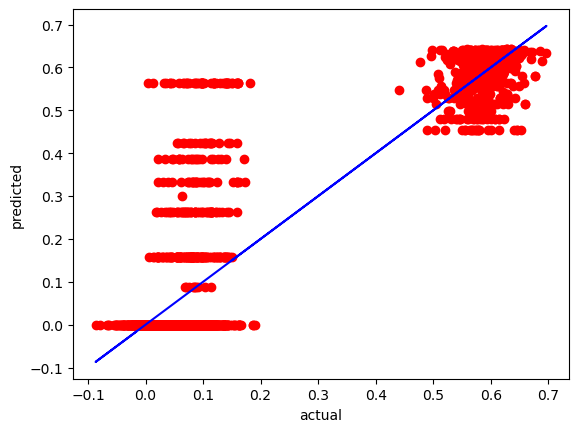

In [133]:
plt.scatter(x=pred_LR, y=y_test, color='r')
plt.plot(pred_LR, pred_LR, color='b')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [119]:
RFR=RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_RFR))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_RFR))
print('mean_squared_error is', mean_squared_error(y_test, pred_RFR))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_RFR)))

r2_score is  0.8912850290628527
r2_score of training is  0.9840048969546491
mean_absolute_error is 0.050961260386426385
mean_squared_error is 0.0069843012633402386
root_mean_squared_error is 0.08357213209760918


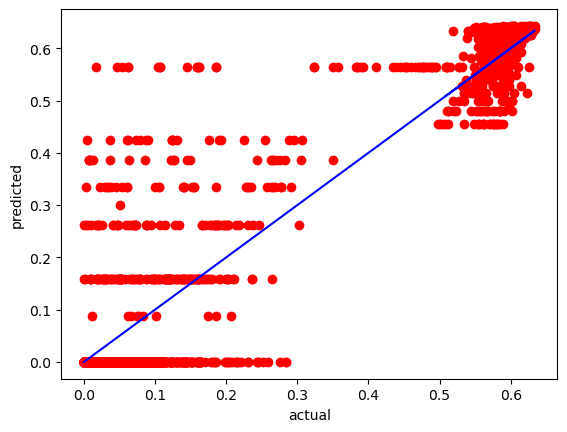

In [120]:
plt.scatter(x=pred_RFR, y=y_test, color='r')
plt.plot(pred_RFR, pred_RFR, color='b')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [121]:
knn=KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_knn))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_knn))
print('mean_squared_error is', mean_squared_error(y_test, pred_knn))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_knn)))

r2_score is  0.7903865766487066
r2_score of training is  0.838843598005492
mean_absolute_error is 0.06754387719129856
mean_squared_error is 0.013466436912096615
root_mean_squared_error is 0.1160449779701673


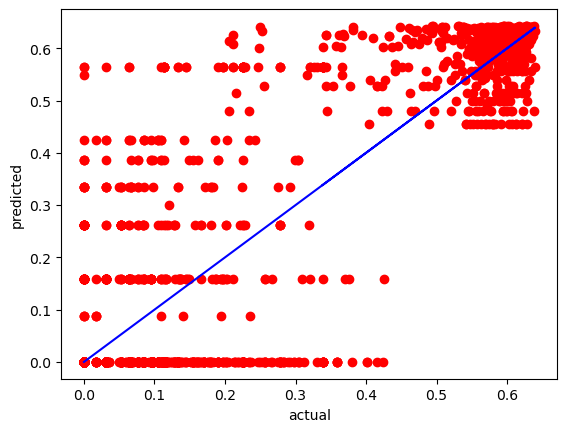

In [122]:
plt.scatter(x=pred_knn, y=y_test, color='r')
plt.plot(pred_knn, pred_knn, color='b')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [123]:
lasso=Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train= lasso.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_lasso))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_lasso))
print('mean_squared_error is', mean_squared_error(y_test, pred_lasso))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_lasso)))

r2_score is  -0.00040850860520147414
r2_score of training is  0.0
mean_absolute_error is 0.22567251108138903
mean_squared_error is 0.06427039763039813
root_mean_squared_error is 0.25351606976757535


In [124]:
ridge=Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train= ridge.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_ridge))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_ridge))
print('mean_squared_error is', mean_squared_error(y_test, pred_ridge))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_ridge)))

r2_score is  0.8130328999979543
r2_score of training is  0.7819536088798126
mean_absolute_error is 0.0732109832126733
mean_squared_error is 0.012011543042239389
root_mean_squared_error is 0.10959718537553502


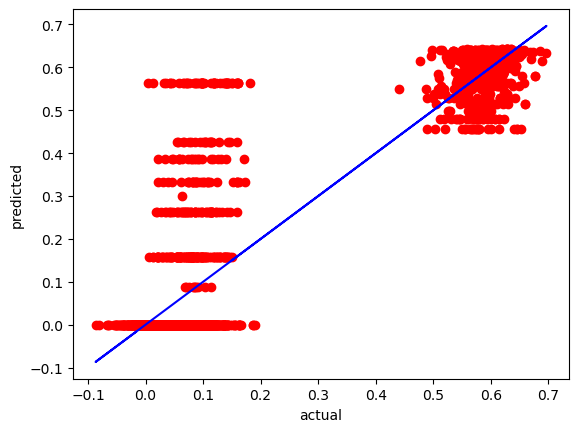

In [134]:
plt.scatter(x=pred_ridge, y=y_test, color='r')
plt.plot(pred_ridge, pred_ridge, color='b')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [125]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(x_train, y_train)
pred_ETR = ETR.predict(x_test)
pred_train= ETR.predict(x_train)
print('r2_score is ',r2_score(y_test, pred_ETR))
print('r2_score of training is ',r2_score(y_train, pred_train))
print('mean_absolute_error is', mean_absolute_error(y_test, pred_ETR))
print('mean_squared_error is', mean_squared_error(y_test, pred_ETR))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred_ETR)))

r2_score is  0.8997473245599267
r2_score of training is  1.0
mean_absolute_error is 0.04346100182650025
mean_squared_error is 0.006440648253810003
root_mean_squared_error is 0.08025364947346633


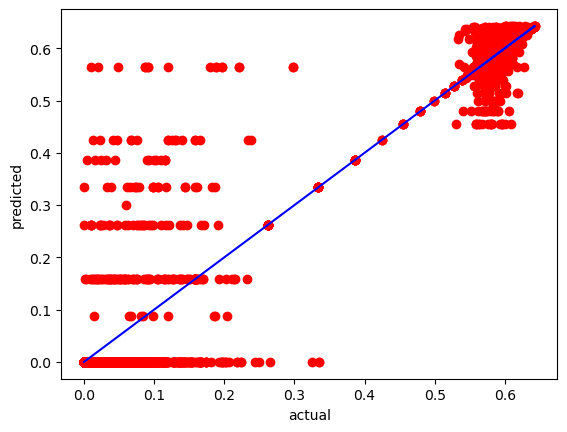

In [126]:
plt.scatter(x=pred_ETR, y=y_test, color='r')
plt.plot(pred_ETR, pred_ETR, color='b')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

# cross val score

In [127]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_LR)-score.mean())

[0.87088836 0.75062455 0.76942801 0.67594697 0.87446661]
0.7882708998384105
Difference is 0.024760110579027605


In [128]:
score = cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_RFR)-score.mean())

[0.8446162  0.84532427 0.88331528 0.72627149 0.81337725]
0.8225808962935123
Difference is 0.0687041327693404


In [129]:
score = cross_val_score(knn,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_knn)-score.mean())

[0.76864317 0.72467024 0.71060604 0.65594824 0.71570346]
0.715114228448462
Difference is 0.07527234820024464


In [130]:
score = cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_lasso)-score.mean())

[-0.00522065 -0.00690423 -0.00848379 -0.02072807 -0.08124782]
-0.02451691173223547
Difference is 0.024108403127033995


In [131]:
score = cross_val_score(ridge,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_ridge)-score.mean())

[0.87088624 0.75063843 0.76941955 0.67596482 0.87446381]
0.7882745687029358
Difference is 0.024758331295018476


In [132]:
score = cross_val_score(ETR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference is", r2_score(y_test,pred_ETR)-score.mean())

[0.85212528 0.8571817  0.90672838 0.73827519 0.83868359]
0.8385988272045841
Difference is 0.06114849735534256


Considering the cross val score and the model individual performance, selecting ETR as the best fitting model.

# Hyperparameter tuning

In [137]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False],  
    'random_state': [10, 50, 100]  
 
}
estimator = ExtraTreesRegressor()

gscv = GridSearchCV(estimator, param, cv=5, n_jobs=-1)

In [138]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150],
                         'random_state': [10, 50, 100]})

In [139]:
gscv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 150,
 'random_state': 100}

In [140]:
Model = ExtraTreesRegressor(bootstrap=False, max_depth = None, n_estimators=150, random_state=100, max_features='sqrt')

In [141]:
Model.fit(x_train, y_train)
pred = Model.predict(x_test)
print('r2_score is ',r2_score(y_test, pred))
print('mean_absolute_error is', mean_absolute_error(y_test, pred))
print('mean_squared_error is', mean_squared_error(y_test, pred))
print('root_mean_squared_error is', np.sqrt(mean_squared_error(y_test, pred)))

r2_score is  0.8979392039405111
mean_absolute_error is 0.04639390907596318
mean_squared_error is 0.006556809432142628
root_mean_squared_error is 0.08097412816537532


In [142]:
#saving model 
import pickle 
filename='rainfall_forecast.pkl'
pickle.dump(Model, open(filename,'wb'))

In [143]:
import pickle 
loaded_model = pickle.load(open('rainfall_forecast.pkl', 'rb'))
res = loaded_model.score(x_test, y_test)
print(res*100)

89.79392039405111


In [144]:
final = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=['predicted','original'])
final

,0,1,2,3,4,5,6,7,8,9,...,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396
predicted,0.56402,0.571507,0.580872,0.067757,0.032765,0.047469,0.058966,0.021387,0.13743,0.063072,...,0.06636,0.0,0.158831,0.547722,0.55069,0.552591,0.0,0.00376,0.078386,0.0
original,0.56402,0.612277,0.621520,0.158831,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.0,0.158831,0.595217,0.61071,0.631651,0.0,0.00000,0.262208,0.0


In summary, the Rainfall Weather Forecasting project aims to leverage machine learning algorithms to predict whether it will rain tomorrow and estimate the amount of rainfall. By analyzing 10 years of daily weather observations from various locations in Australia, we seek to develop accurate predictive models that can provide valuable insights for weather forecasting. These models have the potential to enhance our understanding of atmospheric conditions and improve preparedness for potential rainfall events, benefiting individuals, businesses, and communities alike.